In [1]:
import os
import re
import matplotlib as mpl

from med_associates_utils.session import parse_directory, SessionCollection
from med_associates_utils.viz import plot_cumulative_events

mpl.rcParams['pdf.fonttype'] = 42

In [2]:
base_path = r'C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files'
data_sources = {
    os.path.join(base_path, "MT - Day 1"): {'Genotype': 'MT', 'Day': 'Day1'},
    os.path.join(base_path, "MT - Day 2"): {'Genotype': 'MT', 'Day': 'Day2'},
    os.path.join(base_path, "MT - Day 3"): {'Genotype': 'MT', 'Day': 'Day3'},
    os.path.join(base_path, "MT - Day 4"): {'Genotype': 'MT', 'Day': 'Day4'},

    os.path.join(base_path, "WT - Day 1"): {'Genotype': 'WT', 'Day': 'Day1'},
    os.path.join(base_path, "WT - Day 2"): {'Genotype': 'WT', 'Day': 'Day2'},
    os.path.join(base_path, "WT - Day 3"): {'Genotype': 'WT', 'Day': 'Day3'},
    os.path.join(base_path, "WT - Day 4"): {'Genotype': 'WT', 'Day': 'Day4'},
}

sessions = SessionCollection()
for path, meta in data_sources.items():
    print(f'reading path "{path}"')
    ss = parse_directory(path)
    ss.update_metadata(meta)
    sessions.extend(ss)

def set_animal_id(session):
    animal_id = re.search("EN#\d+", session.metadata['Subject']).group(0)
    session.metadata['Animal'] = animal_id

def rename_arrays_by_program(session):
    if session.metadata['MSN'] in ['CRF', 'CRF-Cue2-rewire']:
        session.rename_array('B', 'rewarded_nosepoke')
        session.rename_array('C', 'magazine_entry')
        session.rename_array('D', 'reward_retrieval_latency')

    elif session.metadata['MSN'] == 'CRFv2023':
        session.rename_array('B', 'nosepoke')
        session.rename_array('C', 'magazine_entry')
        session.rename_array('D', 'reward_retrieval_latency')
        session.rename_array('F', 'rewarded_nosepoke')

sessions.apply(set_animal_id)
sessions.apply(rename_arrays_by_program)
sessions.describe()



reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 1"


  0%|          | 0/30 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 2"


  0%|          | 0/30 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 3"


  0%|          | 0/30 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 4"


  0%|          | 0/30 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 1"


  0%|          | 0/26 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 2"


  0%|          | 0/26 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 3"


  0%|          | 0/26 [00:00<?, ?it/s]

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 4"


  0%|          | 0/26 [00:00<?, ?it/s]

Number of sessions: 224

Arrays present in data with counts:
(224) "A"
(224) "rewarded_nosepoke"
(224) "magazine_entry"
(224) "reward_retrieval_latency"
(60) "nosepoke"

Scalars present in data with counts:
(224) "R"
(224) "S"




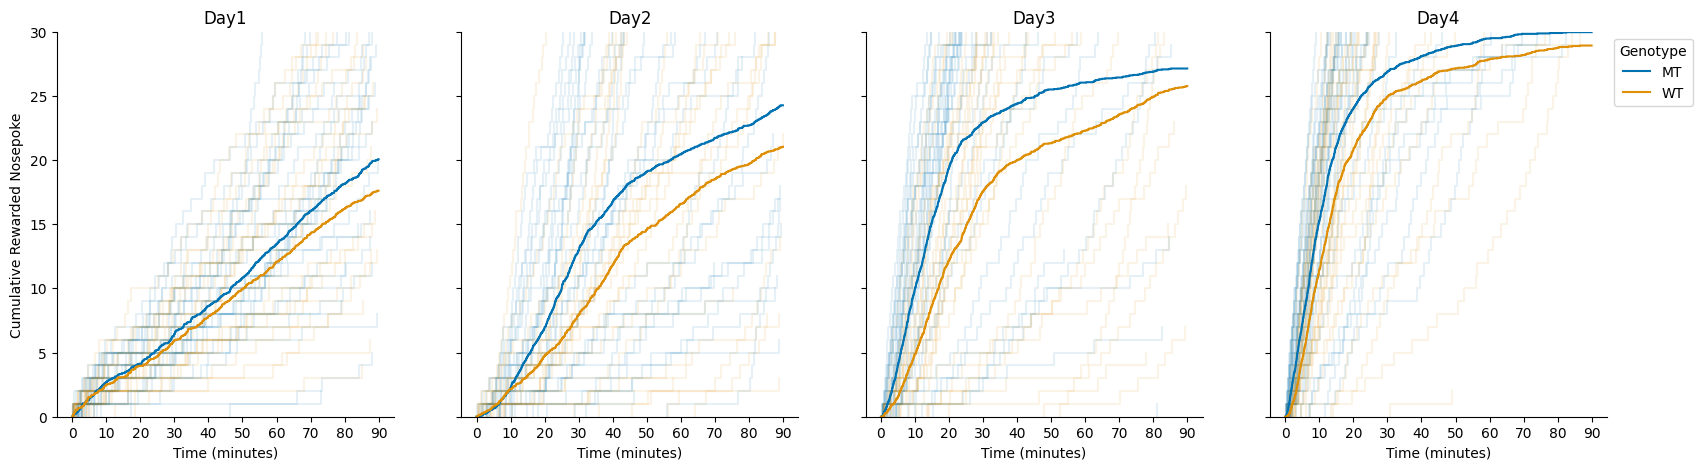

In [4]:
event_df = sessions.to_dataframe(include_meta=['Genotype', 'Day', 'Animal', 'Subject'])
result = plot_cumulative_events(event_df, col='Day', event='rewarded_nosepoke', individual='Subject', hue='Genotype')
result.fig

In [6]:
result.means

,Day,Genotype,time,mean_rewarded_nosepoke
0,Day1,MT,0.0,0.000000
1,Day1,MT,1.0,0.000000
2,Day1,MT,2.0,0.000000
3,Day1,MT,3.0,0.000000
4,Day1,MT,4.0,0.000000
...,...,...,...,...
43179,Day4,WT,5393.0,28.923077
43180,Day4,WT,5394.0,28.923077
43181,Day4,WT,5395.0,28.923077
43182,Day4,WT,5396.0,28.923077
